# Практика 5

## Задание 1 (Scipy - обрезка изображения)

In [1]:
import requests

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0",
           "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
           "Accept-Language": "en-US,en;q=0.9"
           }

image_url = 'https://img.freepik.com/premium-photo/grayscale-shot-bearded-man-with-shocked-face-expression_181624-57522.jpg?w=1380'
filename = 'bearded-man-with-shocked-face-expression.jpg'
img_data = requests.get(url=image_url, headers=headers).content

r = requests.get(image_url, allow_redirects=True)
open(filename, 'wb').write(r.content)

156686

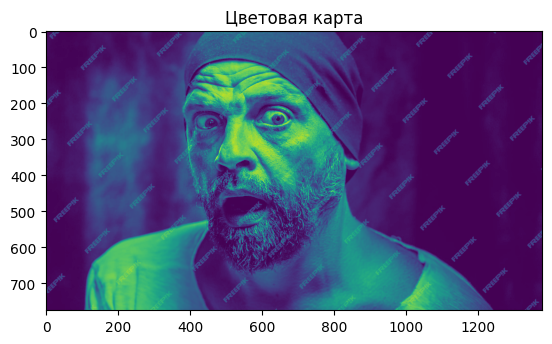

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
plt.imshow(img[:, :, 0])
plt.title('Цветовая карта')
plt.show()

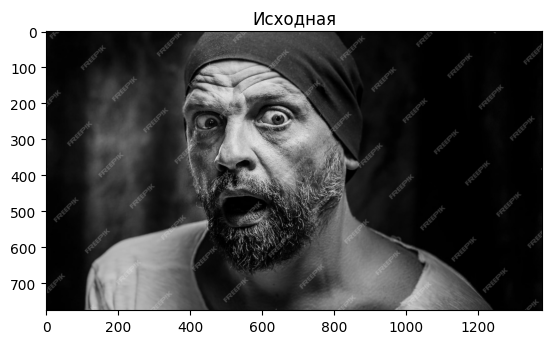

In [3]:
# imgplot = plt.imshow(img, cmap=plt.cm.gray)
imgplot = plt.imshow(img)
plt.title('Исходная')
plt.show()

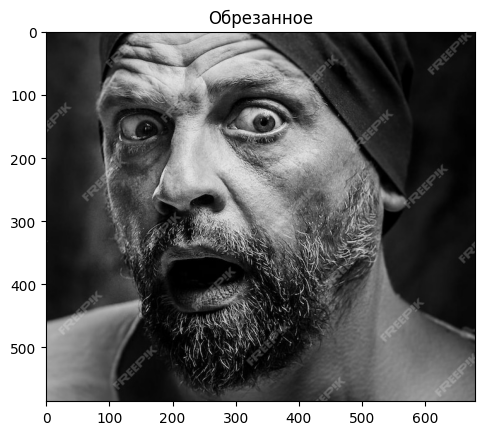

In [4]:
crop_img = img[100:-90, 300:-400]
plt.imshow(crop_img, cmap="gray")
plt.title('Обрезанное')
plt.show()

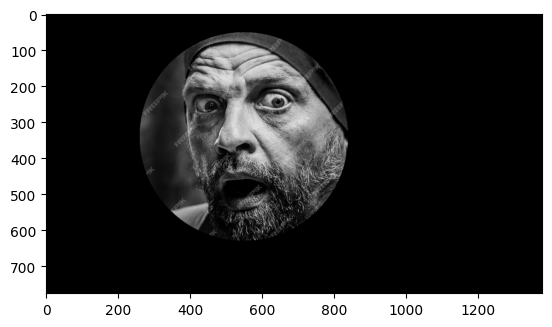

In [5]:
import numpy as np
from PIL import Image
img = np.array(Image.open(filename))
sy, sx, sz = img.shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape

centerx, centery = (550, 340) # центр изображения
mask = ((y - centery)**2 + (x - centerx)**2) > 290**2 # круг
img[mask] = 0
plt.imshow(img) 

## Задание 2 (Работа со статистикой)

In [6]:
import requests
target_url = 'https://scipy-lectures.org/_downloads/populations.txt'
response = requests.get(target_url)
text_data = response.text

filename = 'populations.txt'

with open(filename, 'w') as file:
    file.write(text_data)

In [7]:
data = np.loadtxt(filename, skiprows=1)
year, hares, lynxes, carrots = data.T  # колонки в переменные

In [23]:
populations = data[:,1:]
headers = ['Hares', 'Lynxes', 'Carrots']
mean = populations.mean(axis=0)

print("Среднее:", np.stack((headers, mean), axis=1))

std = populations.std(axis=0)
print("Стандартная девиация:", np.stack((headers, std), axis=1))

max_years = np.argmax(populations, axis=0)
print("Популяция каждого вида была наибольшей в год:", year[max_years])

max_species = np.argmax(populations, axis=1)
species = np.array(['hare', 'lynx', 'carrot'])

print("Вид с наибольшую популяцию за каждый год:", np.stack((year, species[max_species]), axis=1))

above_level_species = np.any(populations > 50000, axis=1)
print("Любая из популяций превышает 50000 в годы:", year[above_level_species])

top2 = np.argsort(populations, axis=0)[:2]
print("Топ 2 года для каждого вида, когда его популяции были самыми низкими:", year[top2])

hare_grade = np.gradient(hares, 1.0)
lynx_grade = np.gradient(lynxes, 1.0)
print("Изменение численности зайцев", hare_grade)
print("Изменение численности рысей", lynx_grade)
print("Корреляция:", np.corrcoef(hare_grade, lynx_grade)[0, 1])

Среднее: [['Hares' '34080.95238095238']
 ['Lynxes' '20166.666666666668']
 ['Carrots' '42400.0']]
Стандартная девиация: [['Hares' '20897.906458089667']
 ['Lynxes' '16254.591536908763']
 ['Carrots' '3322.5062255844787']]
Популяция каждого вида была наибольшей в год: [1903. 1904. 1900.]
Вид с наибольшую популяцию за каждый год: [['1900.0' 'carrot']
 ['1901.0' 'carrot']
 ['1902.0' 'hare']
 ['1903.0' 'hare']
 ['1904.0' 'lynx']
 ['1905.0' 'lynx']
 ['1906.0' 'carrot']
 ['1907.0' 'carrot']
 ['1908.0' 'carrot']
 ['1909.0' 'carrot']
 ['1910.0' 'carrot']
 ['1911.0' 'carrot']
 ['1912.0' 'hare']
 ['1913.0' 'hare']
 ['1914.0' 'hare']
 ['1915.0' 'lynx']
 ['1916.0' 'carrot']
 ['1917.0' 'carrot']
 ['1918.0' 'carrot']
 ['1919.0' 'carrot']
 ['1920.0' 'carrot']]
Любая из популяций превышает 50000 в годы: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Топ 2 года для каждого вида, когда его популяции были самыми низкими: [[1917. 1900. 1916.]
 [1916. 1901. 1903.]]
Изменение численности зайцев [ 17200.  20100.  

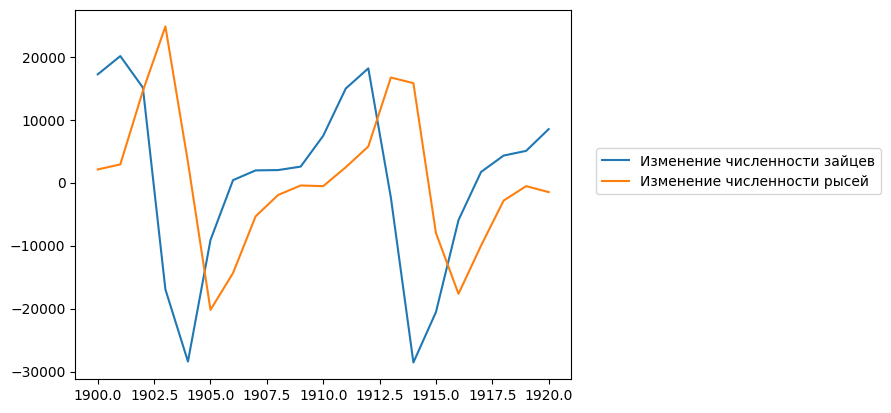

In [21]:
plt.plot(year, hare_grade, year, lynx_grade) 
plt.legend(('Изменение численности зайцев', 'Изменение численности рысей'), loc=(1.05, 0.5))
plt.show()

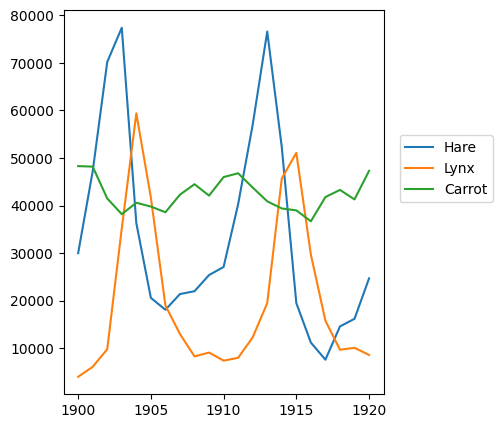

In [9]:
import matplotlib.pyplot as plt

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

## Задание 3 (Множество Мандельброта)

In [10]:
n = 50
threshold = 50

x, y = np.ogrid[-2:1:5000j, -1.5:1.5:5000j]
c = x + 1j * y

z = 0
for j in range(n):
    z = z ** 2 + c

mask=np.abs(z) < threshold

C:\Users\Alex\AppData\Local\Temp\ipykernel_9576\588820337.py:9: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\Alex\AppData\Local\Temp\ipykernel_9576\588820337.py:9: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


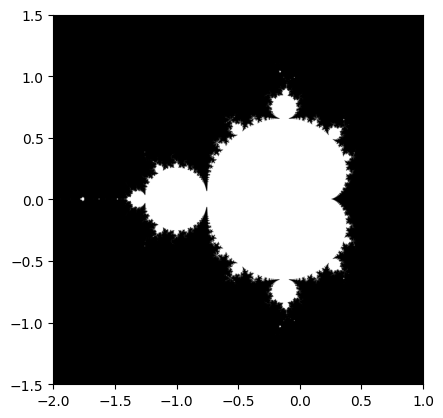

In [11]:
import matplotlib.pyplot as plt
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5]) 

plt.gray()
plt.savefig('mandelbrot.png')
plt.show()